# Ultimate Challenge - part 3 - Modelling

## Setup

Let's begin by importing packages and loading our data into a pandas dataframe.

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [2]:
import json

with open("ultimate_data_challenge.json", 'r') as json_file:
    ultimate_data = json.load(json_file)

In [3]:
ultimate_data

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [4]:
len(ultimate_data)

50000

In [5]:
ultimate_data[1]

{'city': 'Astapor',
 'trips_in_first_30_days': 0,
 'signup_date': '2014-01-29',
 'avg_rating_of_driver': 5.0,
 'avg_surge': 1.0,
 'last_trip_date': '2014-05-05',
 'phone': 'Android',
 'surge_pct': 0.0,
 'ultimate_black_user': False,
 'weekday_pct': 50.0,
 'avg_dist': 8.26,
 'avg_rating_by_driver': 5.0}

In [6]:
keys = list(ultimate_data[1].keys())
keys

['city',
 'trips_in_first_30_days',
 'signup_date',
 'avg_rating_of_driver',
 'avg_surge',
 'last_trip_date',
 'phone',
 'surge_pct',
 'ultimate_black_user',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver']

In [7]:
ultimate_data[1][keys[0]]

'Astapor'

In [8]:
# let's get our ultimate_data into a pandas df

ultimate_df = pd.DataFrame(ultimate_data, columns=keys)

ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [9]:
ultimate_df.info()

# let's see what data we have and what type
# our data seems pretty complete! I don't think that we need to drop anything

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Let's create a result (y) column

We want to find out which users are active in their sixth month. Let's look at the data. Signup dates are all in Jan 2014, and last trip dates are from Jan to Jul 2014. Let's set retention as: those who are not active after June 1 (0, no retention) and those who are active after June 1 (1, retention).

In [10]:
# now let's feature engineer our result (y) column:
# users who are still using the app in the sixth month

ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [11]:
ultimate_df['signup_date'].value_counts()

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

In [12]:
ultimate_df['last_trip_date'].value_counts()

2014-06-29    2036
2014-06-28    1679
2014-06-30    1408
2014-06-27    1120
2014-06-22    1024
              ... 
2014-02-26      79
2014-03-11      79
2014-02-20      74
2014-03-10      69
2014-03-04      69
Name: last_trip_date, Length: 182, dtype: int64

In [13]:
ultimate_df['signup_date'].sort_values(ascending=False)

30220   2014-01-31
43127   2014-01-31
43123   2014-01-31
38728   2014-01-31
2013    2014-01-31
           ...    
17482   2014-01-01
15387   2014-01-01
1431    2014-01-01
7672    2014-01-01
4674    2014-01-01
Name: signup_date, Length: 50000, dtype: datetime64[ns]

In [14]:
ultimate_df['last_trip_date'].sort_values(ascending=False)

45357   2014-07-01
22735   2014-07-01
14473   2014-07-01
38651   2014-07-01
45126   2014-07-01
           ...    
37295   2014-01-01
34828   2014-01-01
40336   2014-01-01
10729   2014-01-01
31425   2014-01-01
Name: last_trip_date, Length: 50000, dtype: datetime64[ns]

In [15]:
# looks like users all signed up between Jan 1-31, 2014
# and go thru July 1, 2014
# we'll consider a user retained if their last trip was Jun 1, 2014 or later
# "took a trip in the sixth month"

In [16]:
cutoff = datetime(2014, 6, 1)
ultimate_df['last_trip_date'][0] > cutoff

True

In [17]:
cutoff = datetime(2014, 6, 1)
ultimate_df['retention'] = None

for i in range(0, len(ultimate_df)):
    if ultimate_df['last_trip_date'][i] > cutoff:
        ultimate_df['retention'][i] = 1
    else:
        ultimate_df['retention'][i] = 0

<ipython-input-17-b9fd9d7a6909>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate_df['retention'][i] = 1
<ipython-input-17-b9fd9d7a6909>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultimate_df['retention'][i] = 0


In [18]:
ultimate_df['retention'].value_counts()

0    31690
1    18310
Name: retention, dtype: int64

In [19]:
# yay! We have 18310 retained users,
# 31690 who were not retained.

In [20]:
ultimate_df['retention'] = pd.to_numeric(ultimate_df['retention'], errors='coerce')
ultimate_df['retention'].dtype

dtype('int64')

In [21]:
# now let's drop the "last trip date"

ultimate_df.drop(columns=['last_trip_date'], inplace=True)
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,NaN,1.00,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0


## Exploratory Data Analysis

Let's create some graphs to look at which features may be important for user retention. Our features are: qualitative features: city, phone, ultimate_black_user; and quantitative features: trips_in_first_30_days, avg_rating_of_driver, avg_surge, surge_pct, weekday_pct, avg_dist, avg_rating_by_driver.

In [22]:
# let's first create some countplots
# for the qualitative variables

In [23]:
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,NaN,1.00,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0


In [24]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   phone                   49604 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    49799 non-null  float64       
 11  retention               50000 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(6), int

In [25]:
# we have some nans which will trip up modelling
# for phone, let's use ffill
# for our missing values for avg_rating_of_driver and avg_rating_by_driver,
# this might actually be important info! "No ratings given/received"
# let's replace these with zeroes
fill_values = {'phone': ultimate_df['phone'].ffill(), 'avg_rating_of_driver': 0, 'avg_rating_by_driver': 0}
ultimate_df.fillna(fill_values, inplace=True)
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   phone                   50000 non-null  object        
 6   surge_pct               50000 non-null  float64       
 7   ultimate_black_user     50000 non-null  bool          
 8   weekday_pct             50000 non-null  float64       
 9   avg_dist                50000 non-null  float64       
 10  avg_rating_by_driver    50000 non-null  float64       
 11  retention               50000 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(6), int

In [26]:
ultimate_df['city'] = ultimate_df['city'].replace("King's Landing", "Kings Landing")

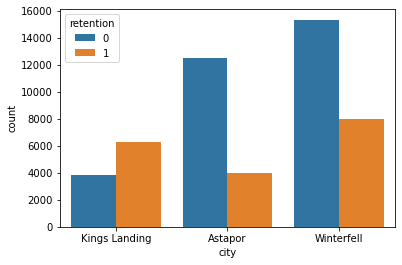

In [27]:
sns.countplot(data=ultimate_df, x='city', hue='retention')
plt.show()

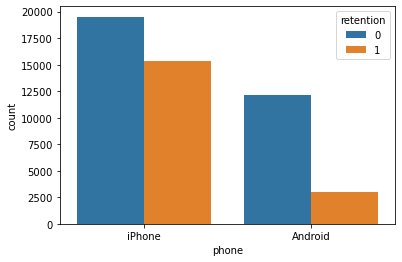

In [28]:
sns.countplot(data=ultimate_df, x='phone', hue='retention')
plt.show()

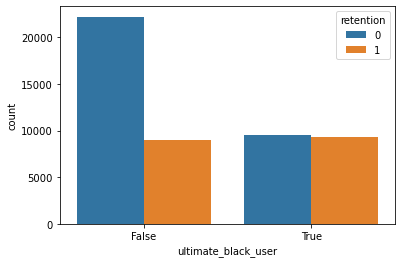

In [29]:
sns.countplot(data=ultimate_df, x='ultimate_black_user', hue='retention')
plt.show()

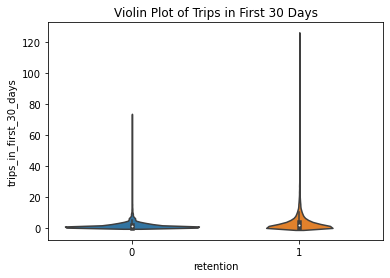

In [30]:
sns.violinplot(data=ultimate_df, x='retention', y='trips_in_first_30_days')
plt.title('Violin Plot of Trips in First 30 Days')
plt.show()

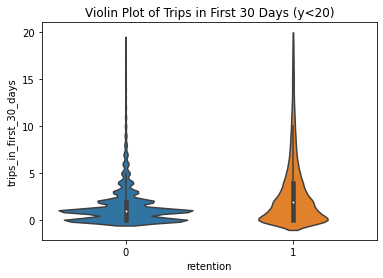

In [31]:
filtered_data = ultimate_df[ultimate_df['trips_in_first_30_days'] < 20]
sns.violinplot(data=filtered_data, x='retention', y='trips_in_first_30_days')
plt.title('Violin Plot of Trips in First 30 Days (y<20)')
plt.show()

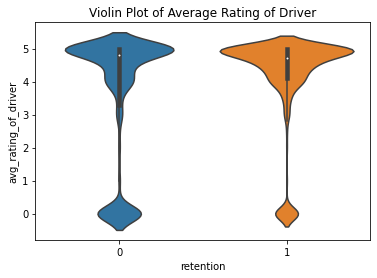

In [32]:
sns.violinplot(data=ultimate_df, x='retention', y='avg_rating_of_driver')
plt.title('Violin Plot of Average Rating of Driver')
plt.show()

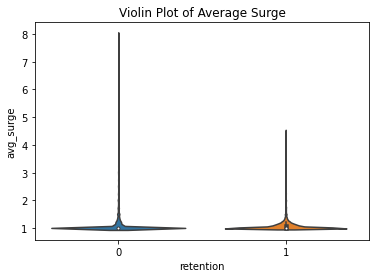

In [33]:
sns.violinplot(data=ultimate_df, x='retention', y='avg_surge')
plt.title('Violin Plot of Average Surge')
plt.show()

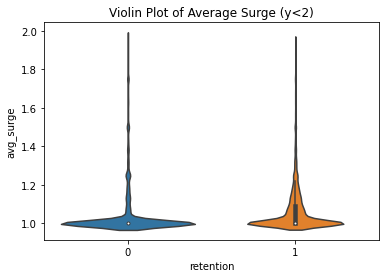

In [34]:
filtered_data2 = ultimate_df[ultimate_df['avg_surge'] < 2] 
sns.violinplot(data=filtered_data2, x='retention', y='avg_surge')
plt.title('Violin Plot of Average Surge (y<2)')
plt.show()

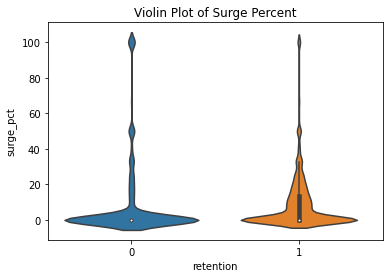

In [35]:
sns.violinplot(data=ultimate_df, x='retention', y='surge_pct')
plt.title('Violin Plot of Surge Percent')
plt.show()

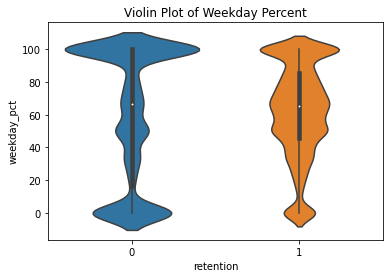

In [36]:
sns.violinplot(data=ultimate_df, x='retention', y='weekday_pct')
plt.title('Violin Plot of Weekday Percent')
plt.show()

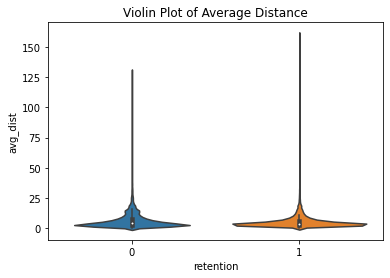

In [37]:
sns.violinplot(data=ultimate_df, x='retention', y='avg_dist')
plt.title('Violin Plot of Average Distance')
plt.show()

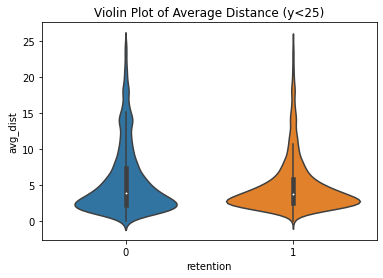

In [38]:
filtered_data3 = ultimate_df[ultimate_df['avg_dist'] < 25] 
sns.violinplot(data=filtered_data3, x='retention', y='avg_dist')
plt.title('Violin Plot of Average Distance (y<25)')
plt.show()

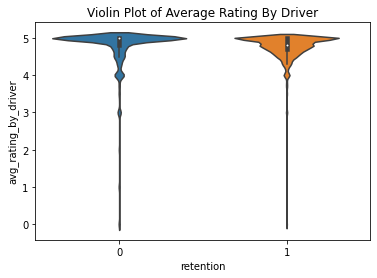

In [39]:
sns.violinplot(data=ultimate_df, x='retention', y='avg_rating_by_driver')
plt.title('Violin Plot of Average Rating By Driver')
plt.show()

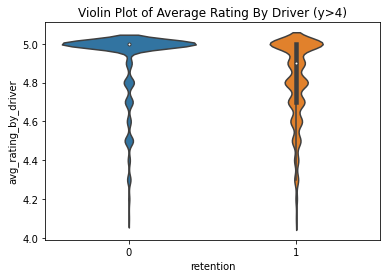

In [40]:
filtered_data4 = ultimate_df[ultimate_df['avg_rating_by_driver'] >4] 
sns.violinplot(data=filtered_data4, x='retention', y='avg_rating_by_driver')
plt.title('Violin Plot of Average Rating By Driver (y>4)')
plt.show()

## Feature Engineering

We need dummy columns for our categorical features. After we split into X and y & train and test, we need to scale our quantitative features.

In [41]:
# now we do some feature engineering
# let's extract the relevant info from datetime columns
# month and day

ultimate_df['signup_month'] = ultimate_df['signup_date'].dt.month
ultimate_df['signup_day'] = ultimate_df['signup_date'].dt.day

In [42]:
ultimate_df.drop(columns=['signup_date'], inplace=True)
ultimate_df

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,signup_month,signup_day
0,Kings Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1,1,25
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,1,29
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,1,6
3,Kings Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,1,10
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Kings Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,1,1,25
49996,Astapor,1,0.0,1.00,iPhone,0.0,False,0.0,0.00,4.0,0,1,24
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0,1,31
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0,1,14


In [43]:
# next we do dummy encoding for the categorical and boolean values
ultimate_df_dummies = pd.get_dummies(ultimate_df, columns=['phone', 'ultimate_black_user'], drop_first=True)
ultimate_df_dummies = pd.get_dummies(ultimate_df_dummies, columns=['city'])
ultimate_df_dummies

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retention,signup_month,signup_day,phone_iPhone,ultimate_black_user_True,city_Astapor,city_Kings Landing,city_Winterfell
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,25,1,1,0,1,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,29,0,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,6,1,0,1,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,10,1,1,0,1,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,27,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,100.0,5.63,4.2,1,1,25,1,0,0,1,0
49996,1,0.0,1.00,0.0,0.0,0.00,4.0,0,1,24,1,0,1,0,0
49997,0,5.0,1.00,0.0,100.0,3.86,5.0,0,1,31,0,1,0,0,1
49998,2,3.0,1.00,0.0,100.0,4.58,3.5,0,1,14,1,0,1,0,0


In [44]:
# split into X and y,
# split into train and test

X = ultimate_df_dummies.drop(columns='retention')
y = ultimate_df_dummies['retention']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=613)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 47629 to 4962
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trips_in_first_30_days    40000 non-null  int64  
 1   avg_rating_of_driver      40000 non-null  float64
 2   avg_surge                 40000 non-null  float64
 3   surge_pct                 40000 non-null  float64
 4   weekday_pct               40000 non-null  float64
 5   avg_dist                  40000 non-null  float64
 6   avg_rating_by_driver      40000 non-null  float64
 7   signup_month              40000 non-null  int64  
 8   signup_day                40000 non-null  int64  
 9   phone_iPhone              40000 non-null  uint8  
 10  ultimate_black_user_True  40000 non-null  uint8  
 11  city_Astapor              40000 non-null  uint8  
 12  city_Kings Landing        40000 non-null  uint8  
 13  city_Winterfell           40000 non-null  uint8  
dtypes: 

In [46]:
y_train.dtype

dtype('int64')

In [47]:
# let's rescale weekday_pct
X_train[['weekday_pct']] = X_train['weekday_pct']/100
X_test[['weekday_pct']] = X_test['weekday_pct']/100

<ipython-input-47-de7a9e0767e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['weekday_pct']] = X_train['weekday_pct']/100
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-47-de7a9e0767e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [48]:
# for our other columns, 
# since we have skewed data with long tails
# let's use power transformer
pow_trans = PowerTransformer()
X_train[['trips_in_first_30_days']] = pow_trans.fit_transform(X_train[['trips_in_first_30_days']])
X_test[['trips_in_first_30_days']] = pow_trans.transform(X_test[['trips_in_first_30_days']])

<ipython-input-48-efe212b2342e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['trips_in_first_30_days']] = pow_trans.fit_transform(X_train[['trips_in_first_30_days']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-48-efe212b2342e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [49]:
pow_trans = PowerTransformer()
X_train[['avg_rating_of_driver']] = pow_trans.fit_transform(X_train[['avg_rating_of_driver']])
X_test[['avg_rating_of_driver']] = pow_trans.transform(X_test[['avg_rating_of_driver']])

<ipython-input-49-ae9a7faaa4fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['avg_rating_of_driver']] = pow_trans.fit_transform(X_train[['avg_rating_of_driver']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-49-ae9a7faaa4fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [50]:
pow_trans = PowerTransformer()
X_train[['avg_surge']] = pow_trans.fit_transform(X_train[['avg_surge']])
X_test[['avg_surge']] = pow_trans.transform(X_test[['avg_surge']])

<ipython-input-50-e771c581bae7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['avg_surge']] = pow_trans.fit_transform(X_train[['avg_surge']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-50-e771c581bae7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [51]:
pow_trans = PowerTransformer()
X_train[['surge_pct']] = pow_trans.fit_transform(X_train[['surge_pct']])
X_test[['surge_pct']] = pow_trans.transform(X_test[['surge_pct']])

<ipython-input-51-e691901aeb11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['surge_pct']] = pow_trans.fit_transform(X_train[['surge_pct']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-51-e691901aeb11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [52]:
pow_trans = PowerTransformer()
X_train[['avg_dist']] = pow_trans.fit_transform(X_train[['avg_dist']])
X_test[['avg_dist']] = pow_trans.transform(X_test[['avg_dist']])

<ipython-input-52-55ee6668c0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['avg_dist']] = pow_trans.fit_transform(X_train[['avg_dist']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-52-55ee6668c0a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [53]:
pow_trans = PowerTransformer()
X_train[['avg_rating_by_driver']] = pow_trans.fit_transform(X_train[['avg_rating_by_driver']])
X_test[['avg_rating_by_driver']] = pow_trans.transform(X_test[['avg_rating_by_driver']])

<ipython-input-53-bb67dd33b49f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['avg_rating_by_driver']] = pow_trans.fit_transform(X_train[['avg_rating_by_driver']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-53-bb67dd33b49f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

## Modelling

# 0. Dummy Classifier
This will give us a baseline with which to measure our models.

In [54]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X_train, y_train)

print("Accuracy Score on Training Set for Dummy Classifier: {}".format(dummy_clf.score(X_train, y_train)))
print("Accuracy Score on Test Set for Dummy Classifier: {}".format(dummy_clf.score(X_test, y_test)))

Accuracy Score on Training Set for Dummy Classifier: 0.6322
Accuracy Score on Test Set for Dummy Classifier: 0.6402


In [55]:
y_pred_dummy = dummy_clf.predict(X_test)
y_probs_dummy = dummy_clf.predict_proba(X_test)

In [56]:
y_pred_dummy

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dummy)

array([[6402,    0],
       [3598,    0]], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy Score on Test Set for Dummy Classifier: {}"
      .format(accuracy_score(y_test, y_pred_dummy)))
print("Precision Score on Test Set for Dummy Classifier: {}"
      .format(precision_score(y_test, y_pred_dummy)))
print("Recall Score on Test Set for Dummy Classifier: {}"
      .format(recall_score(y_test, y_pred_dummy)))
print("F1 Score on Test Set for Dummy Classifier: {}"
      .format(f1_score(y_test, y_pred_dummy)))
print("ROC-AUC score on Test Set for Dummy Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_dummy)))

Accuracy Score on Test Set for Dummy Classifier: 0.6402
Precision Score on Test Set for Dummy Classifier: 0.0
Recall Score on Test Set for Dummy Classifier: 0.0
F1 Score on Test Set for Dummy Classifier: 0.0
ROC-AUC score on Test Set for Dummy Classifier: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 1. K Nearest Neighbors

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {"n_neighbors": np.arange(1, 50, 2),
        "weights": ['uniform', 'distance'],
         'p': [1, 2]}
knn_cv = RandomizedSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [60]:
print("Tuned KNN Classifier Parameters: {}".format(knn_cv.best_params_))
print("Tuned KNN Classifier Best Accuracy Score: {}".format(knn_cv.best_score_))

Tuned KNN Classifier Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 39}
Tuned KNN Classifier Best Accuracy Score: 0.7622500000000001


In [61]:
y_pred_knn = knn_cv.predict(X_test)
y_probs_knn = knn_cv.predict_proba(X_test)

In [62]:
print("Accuracy Score on Test Set for KNN Classifier: {}"
      .format(accuracy_score(y_test, y_pred_knn)))
print("Precision Score - weighted averaged on Test Set for KNN Classifier: {}"
      .format(precision_score(y_test, y_pred_knn, average='weighted')))
print("Recall Score - weighted averaged on Test Set for KNN Classifier: {}"
      .format(recall_score(y_test, y_pred_knn, average='weighted')))
print("F1 Score - weighted averaged on Test Set for KNN Classifier: {}"
      .format(f1_score(y_test, y_pred_knn, average='weighted')))
print("ROC-AUC score - weighted averaged on Test Set for KNN Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_knn, average='weighted')))

Accuracy Score on Test Set for KNN Classifier: 0.7671
Precision Score - weighted averaged on Test Set for KNN Classifier: 0.7624934692238661
Recall Score - weighted averaged on Test Set for KNN Classifier: 0.7671
F1 Score - weighted averaged on Test Set for KNN Classifier: 0.7624804237490069
ROC-AUC score - weighted averaged on Test Set for KNN Classifier: 0.7311269199331296


# 2. Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
params = {"C": [100, 10, 1.0, 0.1, 0.01]}
LR_cv = RandomizedSearchCV(LR, params, cv=5)
LR_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01]})

In [64]:
print("Tuned Logistic Regression Parameters: {}"
      .format(LR_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}"
      .format(LR_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.01}
Tuned Logistic Regression Best Accuracy Score: 0.750875


In [65]:
y_pred_LR = LR_cv.predict(X_test)
y_probs_LR = LR_cv.predict_proba(X_test)

In [66]:
print("Accuracy Score on Test Set for Logistic Regression Classifier: {}"
      .format(accuracy_score(y_test, y_pred_LR)))
print("Precision Score - weighted averaged on Test Set for Logistic Regression Classifier: {}"
      .format(precision_score(y_test, y_pred_LR, average='weighted')))
print("Recall Score - weighted averaged on Test Set for Logistic Regression Classifier: {}"
      .format(recall_score(y_test, y_pred_LR, average='weighted')))
print("F1 Score - weighted averaged on Test Set for Logistic Regression Classifier: {}"
      .format(f1_score(y_test, y_pred_LR, average='weighted')))
print("ROC-AUC score - weighted averaged on Test Set for Logistic Regression Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_LR, average='weighted', multi_class='ovo')))

Accuracy Score on Test Set for Logistic Regression Classifier: 0.7517
Precision Score - weighted averaged on Test Set for Logistic Regression Classifier: 0.7461103333572923
Recall Score - weighted averaged on Test Set for Logistic Regression Classifier: 0.7517
F1 Score - weighted averaged on Test Set for Logistic Regression Classifier: 0.7422327959259719
ROC-AUC score - weighted averaged on Test Set for Logistic Regression Classifier: 0.7033961298572795


# 3. Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
params = {"criterion": ['gini', 'entropy', 'log_loss'],
        "splitter": ['best', 'random']}
DT_cv = RandomizedSearchCV(DT, params, cv=5)
DT_cv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'log_loss'

  warnings.warn("Estimator fit failed. The score o

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'splitter': ['best', 'random']})

In [68]:
print("Tuned Decision Tree Parameters: {}"
      .format(DT_cv.best_params_))
print("Tuned Decision Tree Best Accuracy Score: {}"
      .format(DT_cv.best_score_))

Tuned Decision Tree Parameters: {'splitter': 'random', 'criterion': 'gini'}
Tuned Decision Tree Best Accuracy Score: 0.707475


In [69]:
y_pred_DT = DT_cv.predict(X_test)
y_probs_DT = DT_cv.predict_proba(X_test)

In [70]:
print("Accuracy Score on Test Set for Decision Tree Classifier: {}"
      .format(accuracy_score(y_test, y_pred_DT)))
print("Precision Score on Test Set for Decision Tree Classifier: {}"
      .format(precision_score(y_test, y_pred_DT)))
print("Recall Score on Test Set for Decision Tree Classifier: {}"
      .format(recall_score(y_test, y_pred_DT)))
print("F1 Score on Test Set for Decision Tree Classifier: {}"
      .format(f1_score(y_test, y_pred_DT)))
print("ROC-AUC score on Test Set for Decision Tree Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_DT)))

Accuracy Score on Test Set for Decision Tree Classifier: 0.7067
Precision Score on Test Set for Decision Tree Classifier: 0.5895984909727836
Recall Score on Test Set for Decision Tree Classifier: 0.6081156197887715
F1 Score on Test Set for Decision Tree Classifier: 0.5987139143521686
ROC-AUC score on Test Set for Decision Tree Classifier: 0.6851106058956354


In [71]:
print("Accuracy Score on Test Set for Decision Tree Classifier: {}"
      .format(accuracy_score(y_test, y_pred_DT)))
print("Precision Score - weighted averaged on Test Set for Decision Tree Classifier: {}"
      .format(precision_score(y_test, y_pred_DT, average='weighted')))
print("Recall Score - weighted averaged on Test Set for Decision Tree Classifier: {}"
      .format(recall_score(y_test, y_pred_DT, average='weighted')))
print("F1 Score - weighted averaged on Test Set for Decision Tree Classifier: {}"
      .format(f1_score(y_test, y_pred_DT, average='weighted')))
print("ROC-AUC score - weighted averaged on Test Set for Decision Tree Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_DT, average='weighted')))

Accuracy Score on Test Set for Decision Tree Classifier: 0.7067
Precision Score - weighted averaged on Test Set for Decision Tree Classifier: 0.7088040659119216
Recall Score - weighted averaged on Test Set for Decision Tree Classifier: 0.7067
F1 Score - weighted averaged on Test Set for Decision Tree Classifier: 0.7076615024567178
ROC-AUC score - weighted averaged on Test Set for Decision Tree Classifier: 0.6851106058956354


# 4. Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
y_pred_rf = RF.predict(X_test)
y_probs_rf = RF.predict_proba(X_test)

In [74]:
print("Accuracy Score on Test Set for Random Forest Classifier: {}"
      .format(accuracy_score(y_test, y_pred_rf)))
print("Precision Score - weighted averaged on Test Set for Random Forest Classifier: {}"
      .format(precision_score(y_test, y_pred_rf, average='weighted')))
print("Recall Score - weighted averaged on Test Set for Random Forest Classifier: {}"
      .format(recall_score(y_test, y_pred_rf, average='weighted')))
print("F1 Score - weighted averaged on Test Set for Random Forest Classifier: {}"
      .format(f1_score(y_test, y_pred_rf, average='weighted')))
print("ROC-AUC score - weighted averaged on Test Set for Random Forest Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_rf, average='weighted')))

Accuracy Score on Test Set for Random Forest Classifier: 0.7748
Precision Score - weighted averaged on Test Set for Random Forest Classifier: 0.7715901473078336
Recall Score - weighted averaged on Test Set for Random Forest Classifier: 0.7748
F1 Score - weighted averaged on Test Set for Random Forest Classifier: 0.7724273794475461
ROC-AUC score - weighted averaged on Test Set for Random Forest Classifier: 0.746270490443943


# 5. Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [76]:
y_pred_gbc = GBC.predict(X_test)
y_probs_gbc = GBC.predict_proba(X_test)

In [77]:
print("Accuracy Score on Test Set for Gradient Boosting Classifier: {}"
      .format(accuracy_score(y_test, y_pred_gbc)))
print("Precision Score - weighted averaged on Test Set for Gradient Boosting Classifier: {}"
      .format(precision_score(y_test, y_pred_gbc, average='weighted')))
print("Recall Score - weighted averaged on Test Set for Gradient Boosting Classifier: {}"
      .format(recall_score(y_test, y_pred_gbc, average='weighted')))
print("F1 Score - weighted averaged on Test Set for Gradient Boosting Classifier: {}"
      .format(f1_score(y_test, y_pred_gbc, average='weighted')))
print("ROC-AUC score - weighted averaged on Test Set for Gradient Boosting Classifier: {}"
      .format(roc_auc_score(y_test, y_pred_gbc, average='weighted')))

Accuracy Score on Test Set for Gradient Boosting Classifier: 0.7938
Precision Score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.7907319084141665
Recall Score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.7938
F1 Score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.7910738299785286
ROC-AUC score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.7648223986424475


# Conclusion

Our GB classifier had the best performance. We used the default parameters (my computer cannot handle cv on RF or GB). 

Accuracy Score on Test Set for Gradient Boosting Classifier: 0.79

Precision Score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.79

Recall Score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.79

F1 Score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.79

ROC-AUC score - weighted averaged on Test Set for Gradient Boosting Classifier: 0.76

In [78]:
GBC_imps = GBC.feature_importances_
GBC_imps

array([0.03609357, 0.01854293, 0.00302807, 0.19062875, 0.12302427,
       0.01683258, 0.25199175, 0.        , 0.00170936, 0.09496493,
       0.0723966 , 0.02607288, 0.16471431, 0.        ])

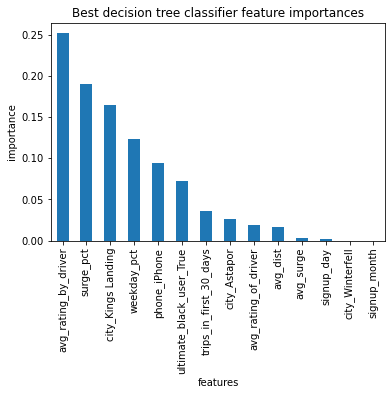

In [79]:
GB_feat_imps = pd.Series(GBC_imps, index=X_train.columns).sort_values(ascending=False)
GB_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best decision tree classifier feature importances')
plt.show()

# Summary

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

From the data, we have 18310 retained users, 31690 who were not retained. This is about 37% of users who were retained.

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

I tried a few different models (KNN, LogReg, DT, RF, and GBC), and ultimately the Gradient Boosting Classifier had the best metrics for accuracy (0.79), precision/recall (both 0.79), and ROC-AUC (0.76).

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

As we can see from the "Feature Importances" graph, certain features are important for user retention. Higher ratings by drivers, higher surge percent usage, and being from Kings Landing are the most important predictors of user retention. 

It could be worth focusing advertising efforts on particular users who will be more likely to be retained: those who are rated highly by drivers, those who are based in Kings Landing, and use iPhones.

Conversely, it could also be worth focusing advertising efforts on users who might otherwise not be likely to be retained: those who don't use during surges, who are based in Astapor or Winterfell, those who aren't likely to use during the weekdays, those with Androids.

Ultimate could try two different advertising campaigns (one directed toward those likely to be retained, one directed toward those not likely to be retained) and see which has an effect.